In [12]:
import math as m
from IPython.display import display as disp
import lablib as ll
%matplotlib inline

In [13]:
data, columns, experiments = ll.read_standard_layout()

Построим график зависимости периода колебаний от ёмкости конденсатора. Пользуясь тем, что $T = 2 \pi \sqrt{LC}$, вычислим индуктивность катушки в контуре, приблизив график соответствующей кривой.


Initial guesses for T = f(C):
     Value    Error  ErrorRel
L 0.132586 0.054297  0.409523

Final guesses for T = f(C):


,Value,Error,ErrorRel
L,0.132586,0.002474,1.87%


[<function lablib.fit2.<locals>.<lambda>>]

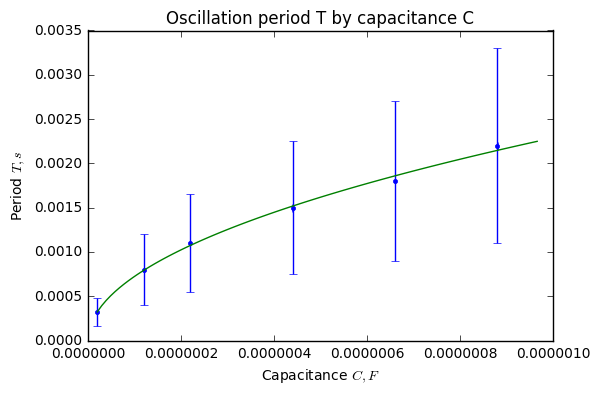

In [15]:
e = "periods"

# precision class: 0.1%
# precision: ±0.1% * (1 + 0.0032/С) where C is in uF
columns[e]["Error_C"] = columns[e]["C"] * 0.001 * (1 + 0.0032/(columns[e]["C"]*10e6))

ll.compute(name = "T",
           expr = lambda x, x_0, T_0: T_0 * x / x_0,
           data = data[e],
           columns = columns[e])

ll.plotfit(title = "Oscillation period T by capacitance C",
           xlabel = "Capacitance $C, F$",
           ylabel = "Period $T, s$",
           model = lambda C, L: 2 * m.pi * (L*C)**(1/2),
           x = "C",
           y = "T",
           columns = columns[e],
           data = data[e])

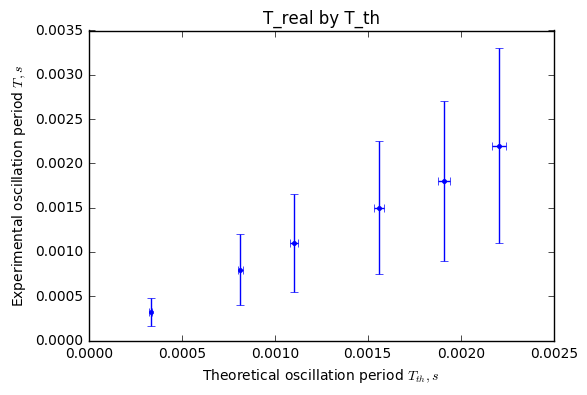

In [18]:
ll.compute(name = "T_th",
           expr = lambda C, L_real: 2 * m.pi * (L_real*C)**(1/2),
           data = data[e],
           columns = columns[e])

ll.plotfit(title = "T_real by T_th",
           xlabel = "Theoretical oscillation period $T_{th}, s$",
           ylabel = "Experimental oscillation period $T, s$",
           x = "T_th",
           y = "T",
           columns = columns[e],
           data = data[e])